## Recognizing Handwritten Digits on MNIST Dataset using KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [4]:
print(df.shape)

(42000, 785)


In [7]:
data = df.values

In [8]:
print(data.shape)

(42000, 785)


In [44]:
x = data[:, 1:]
y = data[:, 0]

[1 0 1 ... 7 6 9]


In [11]:
print(x.shape,y.shape)

(42000, 784) (42000,)


In [15]:
# train test split for better testing of algorithm
split = int(0.8*x.shape[0])
split

33600

In [17]:
# taking 80 % of the original data for training
x_train = x[:split, :]
y_train = y[:split]

In [18]:
# taking 20 % of the original data for testing 
# this is used for better training of the model we have built using the KNN algorithm 
x_test = x[split:, :]
y_test = y[split:]

In [19]:
print(x_train.shape, y_train.shape)

(33600, 784) (33600,)


In [20]:
print(x_test.shape, y_test.shape)

(8400, 784) (8400,)


In [42]:
# visualise some samples
def drawImage(sample):
    # reshape that image
    img = sample.reshape((28,28))
    plt.imshow(img,cmap = 'gray')
    plt.show()

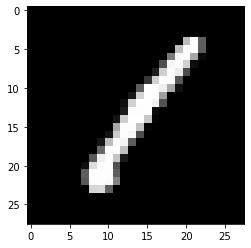

1


In [45]:
drawImage(x_train[0])
print(y_train[0])

In [47]:
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

In [50]:
def knn(x,y,querypoint,k=5):
    vals = []
    for i in range(x.shape[0]):
        d = distance(querypoint,x[i])
        vals.append((d,y[i]))
    
    vals = sorted(vals)
    vals = vals[:k]
    
    vals = np.array(vals)
    
    new_vals = np.unique(vals[:,1],return_counts = True)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    return pred

In [68]:
# make predictions over test images
count = 0
for i in range(40):
    pred=knn(x_train,y_train,x_test[i])
    if(pred == y_test[i]):
        count+=1
accuracy = count/len(x_test)

In [71]:
# Accuracy of the model
print(count/40)

38
0.95
